First 5 rows of dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of dataset: (768, 9)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                  

/tmp/ipython-input-2727648117.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


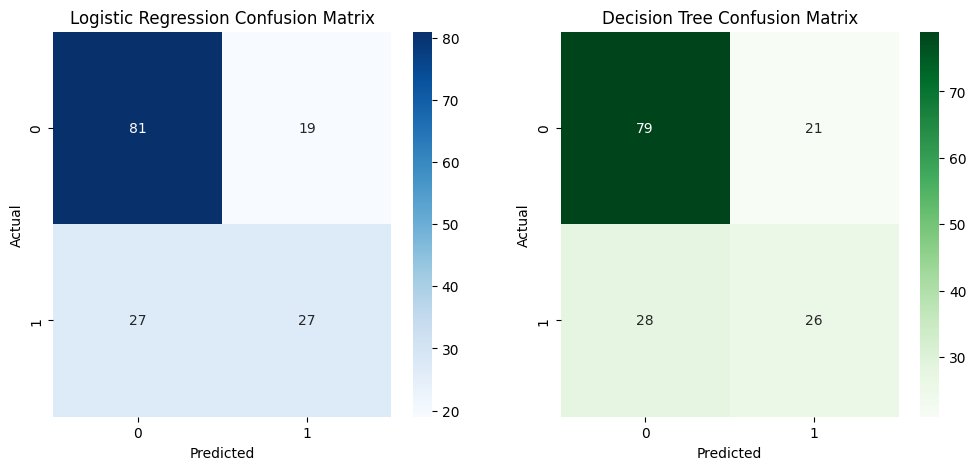

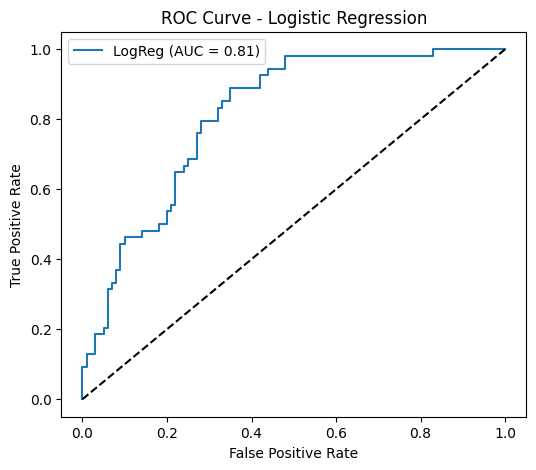

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

data = pd.read_csv("/content/diabetes.csv")

print("First 5 rows of dataset:\n", data.head())
print("\nShape of dataset:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)

# 2. Data Preprocessing
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].median(), inplace=True)

# Features & Target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model Implementation
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_pred_log_prob = log_model.predict_proba(X_test)[:, 1]

# Metrics for Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, y_pred_log_prob)

print("\nLogistic Regression Performance:")
print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("ROC-AUC:", log_roc_auc)

## B. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)

# 4. Model Evaluation & Comparison

## Confusion Matrices
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\nConfusion Matrix - Logistic Regression:\n", cm_log)
print("\nConfusion Matrix - Decision Tree:\n", cm_dt)

# 5. Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {log_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
